In [2]:
import pandas as pd

# Задания 1-3

In [3]:
text = pd.read_csv('text.csv', sep=',')
text.head()

,WORDNO,WORD
0,1,katekizmas
1,2,arba
2,3,mokslas
3,4,kiekvienam
4,5,krikščioniui


In [4]:
vocab = pd.read_csv('vocab.csv', sep=',')
vocab.head()

,WORD,POS
0,***,***
1,",",-
2,-,-
3,.,-
4,?,-


In [5]:
comb = pd.merge(text, vocab, on='WORD', how='left')
comb = comb.dropna()
comb

,WORDNO,WORD,POS
1,2,arba,KO
3,4,kiekvienam,PI
5,6,privalus,ADJ
6,7,.,-
7,8,parašytas,V
...,...,...,...
19416,16575,ant,AP
19418,16577,amžinų,ADJ
19419,16578,",",-
19420,16579,amen,PTK


# Задание 4

In [6]:
shifted = comb[comb['POS'] == comb.shift(-1)['POS']]
shifted

,WORDNO,WORD,POS
9,10,Jokūbą,NT
12,13,societatis,-
13,14,Jesu,-
23,24,Mikalojų,NT
24,25,Daukšą,NT
...,...,...,...
19259,16439,susimilęs,V
19277,16455,laimiai,ADV
19301,16476,tarnauti,V
19323,16492,ir,KO


# Задания 5-6, 8

In [ ]:
means = {}
groupped = shifted.groupby(['POS'])
for group in groupped.groups.keys():
    mean = groupped.get_group(group).WORD.apply(len).rolling(window=3).mean()
    means[group] = mean
    mean_df = groupped.get_group(group)
    mean_df['Moving Mean'] = pd.DataFrame(mean)
    mean_df.to_html(f'htmls/{group}_moving_mean.html')  

In [151]:
print(means.keys())
print(len(means.keys()))

dict_keys(['-', 'ADJ', 'ADV', 'AP', 'CARD', 'KO', 'NT', 'PD', 'PI', 'PPER', 'PTK', 'V'])
12


# Задание 7

In [76]:
import matplotlib
import matplotlib.pyplot as plt

d:\Python\lib\site-packages\matplotlib\axes\_axes.py:6613: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
d:\Python\lib\site-packages\matplotlib\axes\_axes.py:6614: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


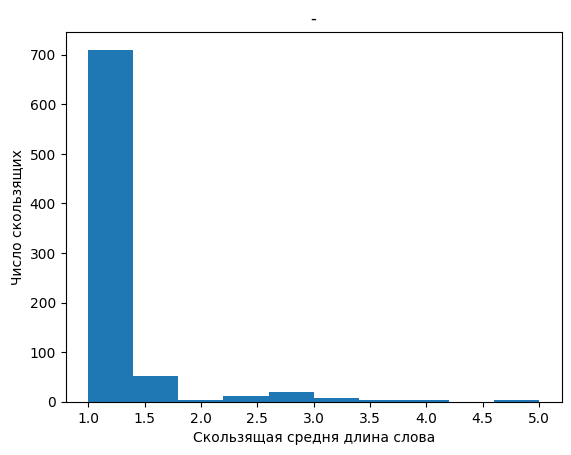

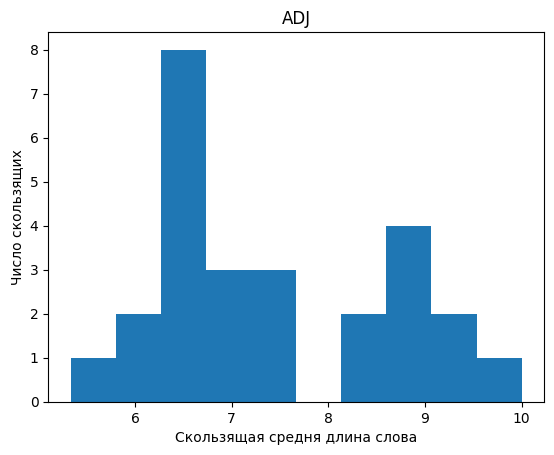

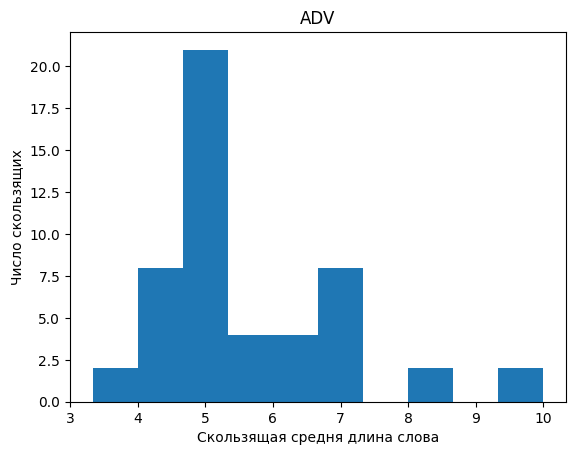

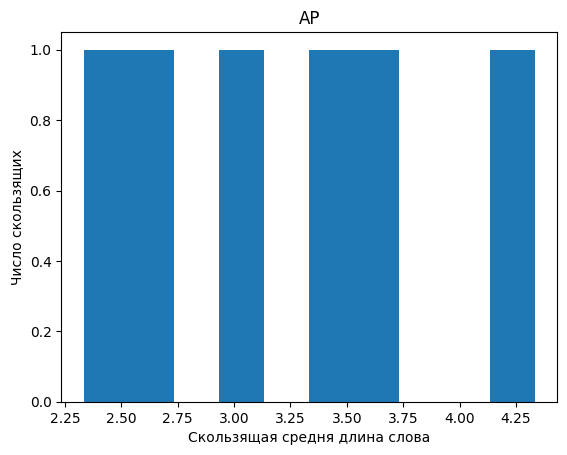

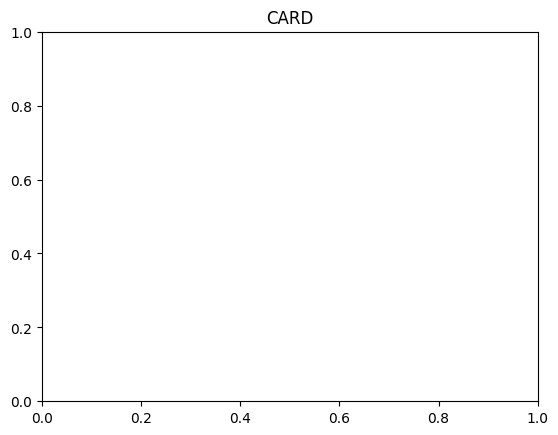

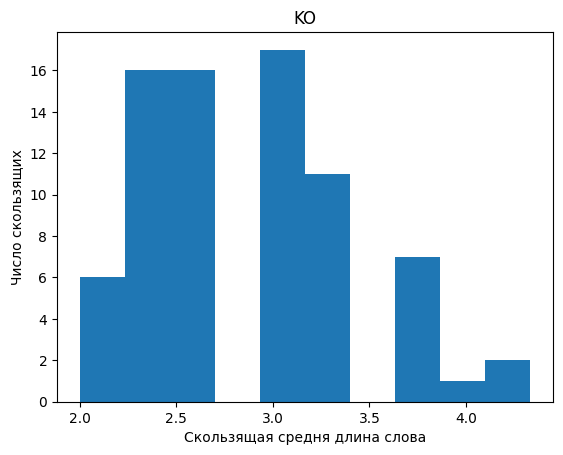

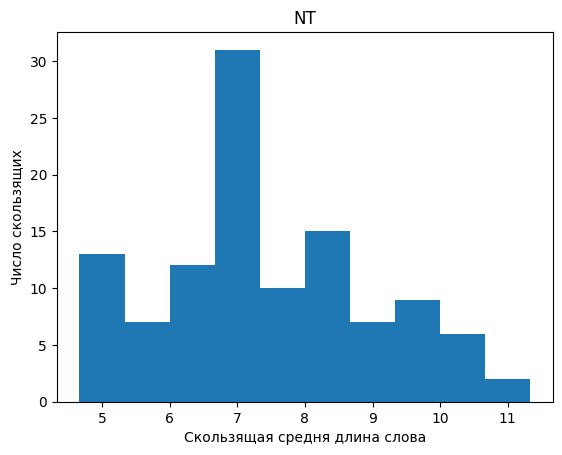

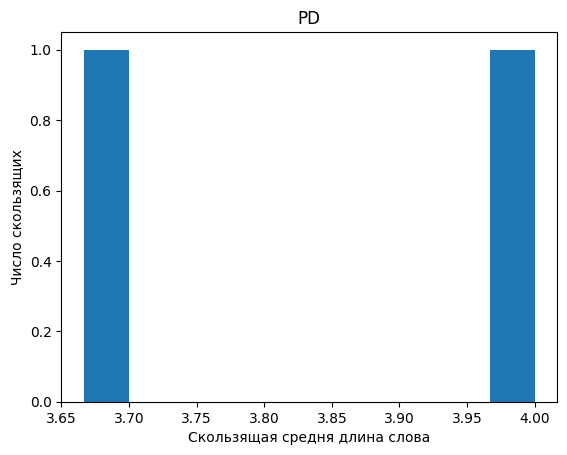

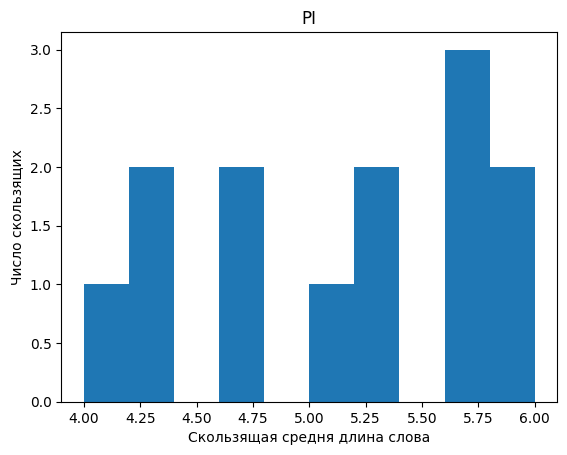

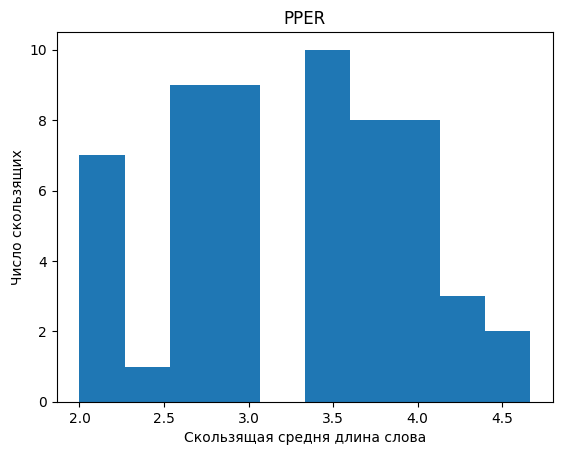

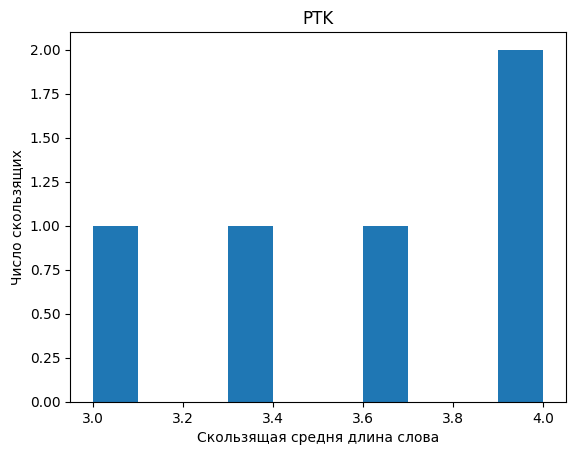

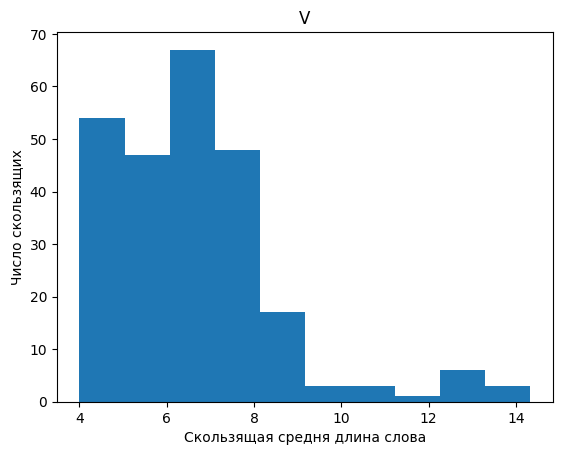

In [161]:

for k, v in means.items():
    try:
        plt.figure()
        plt.title(k)
        plt.hist(v)        
        plt.xlabel('Скользящая средня длина слова')
        plt.ylabel('Число скользящих')
        plt.savefig(f'diagrams/{k}_hist.png')
    except:
        pass